<a href="https://colab.research.google.com/github/marlonandres3m/Evaluacion2020-1/blob/master/1017180547/Examen_2020_1_01_enunciado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primer Examen 15%

## Ejercicio 1
Encuentre las raices positivas de:
$$x^{2}-4 x \sin x+(2 \sin x)^{2}=0$$

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt

In [0]:
#Definiendo funciones necesarias para el método a utilizar (de acuerdo con la gráfica de la función, un posible método es fixed_point).

def f(x):
  return x**2 - 4*x*np.sin(x) + (2*np.sin(x))**2

def g(x):
  return x - f(x)

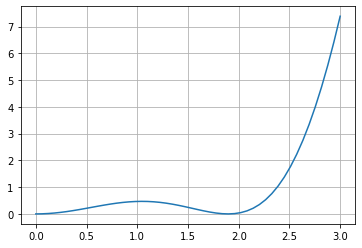

In [68]:
#Se observan solo los valores positivos de la gráfica.

x = np.linspace(0, 3)

plt.plot(x, f(x))
plt.grid()
plt.show()

In [69]:
#Se determinan las raíces con fixed_point.

root_1 = opt.fixed_point(g, 0)
root_2 = opt.fixed_point(g, 2)

print('Las raíces positivas son {} y {}.'.format(root_1, root_2))

Las raíces positivas son 0.0 y 1.895495949803677.


## Ejercicio 2
La rapidez $v$ de un cohete en un vuelo vertical cerca a la superficie de la tierra puede ser aproximada por 
$$
v=u \ln \frac{M_{0}}{M_{0}-\dot{m} t}-g t
$$
donde
* $u$ en $\mathrm{m} / \mathrm{s}=$, es la velocidad de expulsión del combustible relativa al cohete.
* $M_{0}$ en $\mathrm{kg}=$ es la masa del cohete al tiempo de despegue. 
* $\dot{m}$ en $\mathrm{kg} / \mathrm{s}=$ es la tasa consumo de combustible 
* $g=9.8 \mathrm{m} / \mathrm{s}^{2}$ es la aceleración gravitacional
* $t=$ en $s$, tiempo medido desde el despegue

Para los datos en: https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/rocket.json

1. Lea los datos en un `DataFrame` de `pandas` y verifique que $\dot{m}$ (`mdot`) es la única columna que está cambiando.
1. Agregue una columna al `DataFrame` con el tiempo que tarda el cohete para alcanzar la velocidad del sonido $(335 \mathrm{m} / \mathrm{s})$ para cada valor de $\dot{m}$
2. Gráfique dicho tiempo en función de $\dot{m}$ rotulando apropiadamente los ejes

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize as opt

In [71]:
#Carga del DataFrame a partir de archivo json.

df = pd.read_json('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/rocket.json')
df

,M0,g,mdot,u
0,2800000,9.8,10000,2510
1,2800000,9.8,11000,2510
2,2800000,9.8,12000,2510
3,2800000,9.8,13000,2510
4,2800000,9.8,14000,2510
5,2800000,9.8,15000,2510


In [72]:
#Aunque hay valores constantes, se definen en variables.

u = 2510
M0 = 2800000
g = 9.8
v = 335

#Lista vacía para almacenar los tiempos de las respectivas tasas de consumo de combustible (mdot).

times = []

#Iteración para definir el tiempo requerido para alcanzar velocidad del sonido (v) según tasa de consumo de combustible.

for i in df['mdot']:

  mdot = i

  def V(t):
    return u*np.log(M0/(M0-mdot*t)) - g*t - v

  times.append(opt.bisect(V, 0, 150)) #Almacenando los tiempos respectivos en la lista.

#Se crea una Serie a partir de la lista times.

df['t2s'] = pd.Series(times)

#Se muestra DataFrame con nueva variable (t2s)

df  

,M0,g,mdot,u,t2s
0,2800000,9.8,10000,2510,135.830647
1,2800000,9.8,11000,2510,109.017811
2,2800000,9.8,12000,2510,89.202572
3,2800000,9.8,13000,2510,74.455682
4,2800000,9.8,14000,2510,63.324893
5,2800000,9.8,15000,2510,54.770940


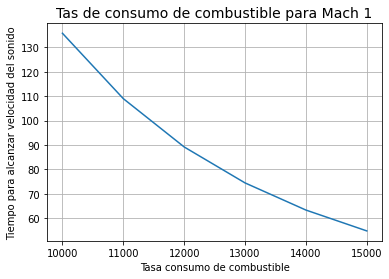

In [73]:
#Se desarrolla gráfica a partir de las series solicitadas (mdot y t2s).

plt.plot(df['mdot'], df['t2s'])
plt.xlabel('Tasa consumo de combustible')
plt.ylabel('Tiempo para alcanzar velocidad del sonido')
plt.title('Tas de consumo de combustible para Mach 1', size=14)
plt.grid()
plt.show()